In [15]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [16]:
#GENERO UN SET DE DATOS RANDOM DE 4 CLUSTERS EN EL PLANO (X,Y)
x, y = make_blobs(n_samples=100, centers=4, n_features=2, random_state=0)

#POR SIMPLICIDAD, PARA TESTEAR EL ALGORTIMO, DIVIDO EL SET ANTERIOR EN TRAIN Y TEST
trainData, testData, trainLabels, testLabels = train_test_split(x, y, test_size=0.20, random_state=42)

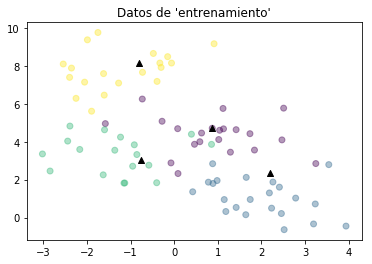

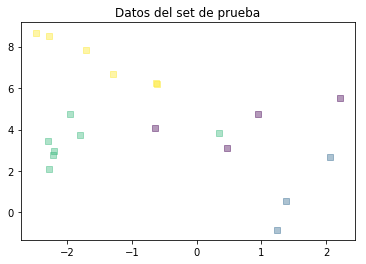

In [17]:
#GENERO ALGUNOS PUNTOS PARA MOSTRAR DE QUÉ SE TRATA EL PROBLEMA
queryData, queryLabels = make_blobs(n_samples=4, centers=4, n_features=2, random_state=0)

#EN ESTE GRAFICO SE MUESTRAN LOS PUNTOS DE LOS CLUSTER Y LOS 4 PUNTOS QUE QUISIERA CLASIFICAR
plt.scatter(trainData[:,0], trainData[:,1], alpha=0.4, c=trainLabels)
plt.scatter(queryData[:,0], queryData[:,1], marker='^', alpha=1, color=['black'])
plt.title("Datos de 'entrenamiento'")
plt.show()

#EN ESTE GRAFICO SE MUESTRAN LOS PUNTOS DEL SET DE TEST
plt.scatter(testData[:,0], testData[:,1], alpha=0.4, marker=',', c=testLabels)
plt.title("Datos del set de prueba")
plt.show()


In [18]:
kVals = range(1, 80, 2)
accuracies = []

#En este loop vamos a ver la precision del algoritmo en funcion de K

for k in kVals:
    #Inicializacion del modelo
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    #A diferencia de otros algoritmos, en KNN no es necesario usar un set de validacion sino que se pueden usar los mismos datos
    score = model.score(trainData, trainLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)


k=1, accuracy=100.00%
k=3, accuracy=95.00%
k=5, accuracy=91.25%
k=7, accuracy=90.00%
k=9, accuracy=91.25%
k=11, accuracy=90.00%
k=13, accuracy=90.00%
k=15, accuracy=90.00%
k=17, accuracy=88.75%
k=19, accuracy=90.00%
k=21, accuracy=88.75%
k=23, accuracy=88.75%
k=25, accuracy=88.75%
k=27, accuracy=90.00%
k=29, accuracy=90.00%
k=31, accuracy=90.00%
k=33, accuracy=91.25%
k=35, accuracy=90.00%
k=37, accuracy=90.00%
k=39, accuracy=91.25%
k=41, accuracy=91.25%
k=43, accuracy=91.25%
k=45, accuracy=87.50%
k=47, accuracy=86.25%
k=49, accuracy=72.50%
k=51, accuracy=71.25%
k=53, accuracy=66.25%
k=55, accuracy=51.25%
k=57, accuracy=50.00%
k=59, accuracy=51.25%
k=61, accuracy=51.25%
k=63, accuracy=50.00%
k=65, accuracy=48.75%
k=67, accuracy=47.50%
k=69, accuracy=47.50%
k=71, accuracy=46.25%
k=73, accuracy=46.25%
k=75, accuracy=46.25%
k=77, accuracy=45.00%
k=79, accuracy=38.75%


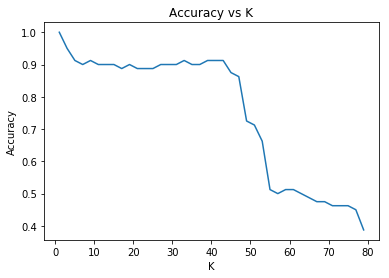

In [19]:
#Grafico la precisión vs el valor de K
plt.plot(kVals, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K')
plt.show()

In [20]:
#PROBAMOS CON K=31

model = KNeighborsClassifier(n_neighbors=31)
model.fit(trainData, trainLabels)

predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("Accuracy para el set de Test: %.2f%%" % (100 * accuracy_score(testLabels, predictions)))

#PODEMOS TAMBIEN PREDECIR LOS 4 PUNTOS QUE HABIAMOS GENERADO PARA EXPLICAR DE QUE TRATABA KNN
predictionsQueryPoints = model.predict(queryData)
print("Accuracy para los 4 puntos Query: %.2f%%" % (100 * accuracy_score(queryLabels, predictionsQueryPoints)))


Accuracy para el set de Test: 95.00%
Accuracy para los 4 puntos Query: 100.00%
